<a href="https://colab.research.google.com/github/tyrneh/options-implied-probability/blob/main/OIPD_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing OIPD in Google Colab

This notebook will install OIPD, fetch some data and display a probability distribution

In [ ]:
# Pip install OIPD
!pip install oipd

In [2]:
from oipd import RND, MarketInputs, ModelParams
import matplotlib.pyplot as plt
from datetime import date

In [4]:
# --- Example 1 - GME --- #
# --- using yfinance connection --- #

# 1. Get a list of available expiry dates
expiry_dates = RND.list_expiry_dates("GME")
print(expiry_dates[:])  # ['2025-09-05', '2025-09-12', '2025-09-19',...]

# 2. Use ticker data with market parameters (current price fetched automatically)
market = MarketInputs(
    valuation_date=date.today(),
    expiry_date=date(2026, 1, 16),
    risk_free_rate=0.04199, # US 3-month nominal Treasury yield
)

# 3. Fetch and estimate - auto-fetched data is available in the result
est_gamestop = RND.from_ticker("GME", market)


['2025-09-19', '2025-09-26', '2025-10-03', '2025-10-10', '2025-10-17', '2025-10-24', '2025-10-31', '2025-11-21', '2026-01-16', '2026-04-17', '2026-06-18', '2027-01-15', '2027-09-17', '2027-12-17']


/usr/local/lib/python3.12/dist-packages/oipd/estimator.py:439: UserWarning: Filtered 8 strikes older than 1 days (most recent: 0 days old, oldest: 7 days old)
  warnings.warn(


Underlying price 26.2901 (source: vendor), implied forward price 26.4816; dividends: none, forward-implied annualised dividend yield of 1.9632%; days_to_expiry=120; r=0.04170280557740321;


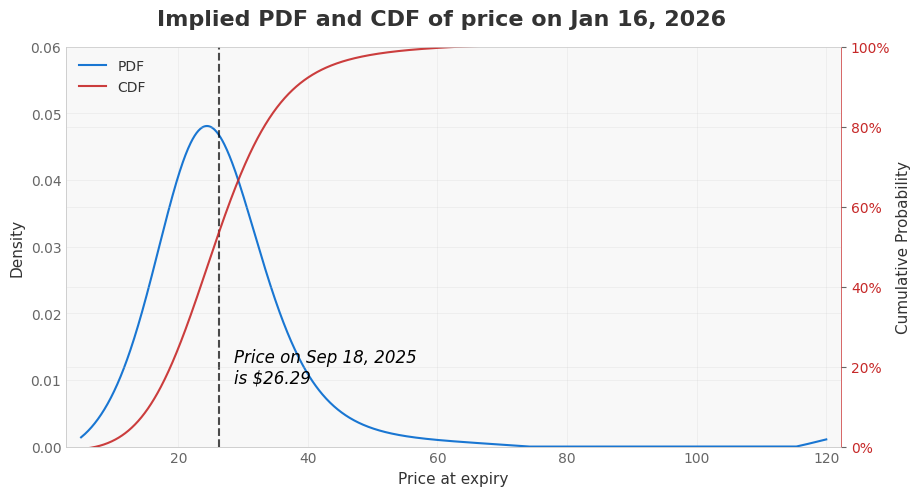

In [5]:
# 4. Check the final market parameters used in estimation
est_gamestop.market

# 5. Plot using the result object
est_gamestop.plot() # optional: `kind="pdf"` or `kind="cdf"`
plt.show()

In [6]:

# 6. Access results
# probability of price at or above a certain level
est_gamestop.prob_at_or_above(100)

# probability of price below a certain level
est_gamestop.prob_below(100)

# get results as a dataframe
est_gamestop.to_frame()

# see all the parameters that were used in the estimation
est_gamestop.summary()

'Underlying price 26.2901 (source: vendor), implied forward price 26.4816; dividends: none, forward-implied annualised dividend yield of 1.9632%; days_to_expiry=120; r=0.04170280557740321;'